The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(4332000,)
(2888000,)
(371469,)
(247646,)


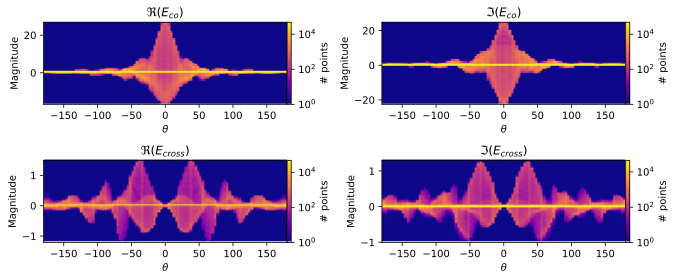

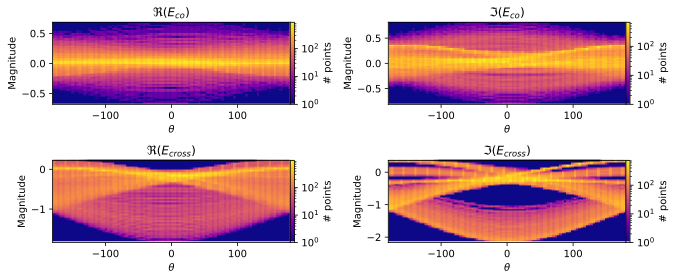

In [17]:
from copy import copy
import time

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
from ssapp.Utils import FigureSaver
from torch.utils.data.dataloader import DataLoader

figSaver = FigureSaver('Dataset Visualisation',default_format='eps',bbox_inches='tight')

#dataset = load_serialized_dataset('CircularHornDataset1')
dataset = load_serialized_dataset('PatchAntennaDataset1')

params, fields = next(iter(DataLoader(dataset,batch_size = len(dataset))))

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2

def plotDatasetHistogram(dataset):
    params, fields = next(iter(DataLoader(dataset,batch_size = len(dataset))))
    x = np.linspace(-180,180, 361)
    # Generate unbiased Gaussian random walks
    Y = fields[:,:,0:2,0]

    x = np.array([x for y in range(len(Y)*3)]).flatten()
    print(x.shape)
    print(Y.numpy().flatten().shape)
    # You can tune vmax to make signal more visible
    fig,axs = plt.subplots(ncols=2,nrows=2,figsize = (9.5,4),tight_layout = True)

    titles = ['$\Re(E_{co})$','$\Im(E_{co})$','$\Re(E_{cross})$','$\Im(E_{cross})$']

    for idx,ax in enumerate(axs.flatten()):
        Y = fields[:,:,0:3,idx]
        cmap = copy(plt.cm.plasma)
        cmap.set_bad(cmap(0))
        h, xedges, yedges = np.histogram2d(x, Y.numpy().flatten(),bins=[100,50])
        pcm = ax.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                                norm=LogNorm(), rasterized=True)
        fig.colorbar(pcm, ax=ax, label="# points", pad=0)
        ax.set_title(titles[idx])
        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel('Magnitude')




dataset = load_serialized_dataset('CircularHornDataset1')
plotDatasetHistogram(dataset)

figSaver.save('CHA_AllComponentPlot')


dataset = load_serialized_dataset('PatchAntennaDataset1')
plotDatasetHistogram(dataset)

figSaver.save('PATCH_AllComponentPlot')

NameError: name 'x' is not defined

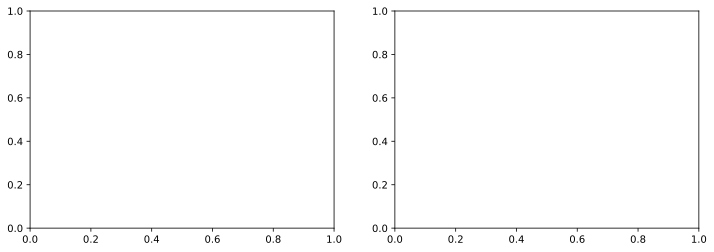

In [19]:
fig,axs = plt.subplots(ncols=2,nrows=1,figsize = (12,4))

mag = lambda a,b: 20*np.log10(np.sqrt(a**2+b**2))
x = np.array([x for y in range(len(Y))]).flatten()
titles = ['$E_{co}$ Magnitude 2D Histogram','$E_{cross}$ Magnitude 2D Histogram']
ylabel = ['$|E_{co}|$dB','$|E_{cross}|$dB']

for idx,ax in enumerate(axs.flatten()):
    Y = np.array([])
    
    Y = mag(fields[:,:,0,0+2*idx],fields[:,:,0,1+2*idx])

    cmap = copy(plt.cm.plasma)
    cmap.set_bad(cmap(0))
    h, xedges, yedges = np.histogram2d(x, Y.numpy().flatten(),bins=[361,300])
    pcm = ax.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                            norm=LogNorm(), rasterized=True)
    fig.colorbar(pcm, ax=ax, label="# points", pad=0)
    ax.set_xlabel(r'$\theta\degree$')
    ax.set_ylabel(ylabel[idx])
    ax.set_title(titles[idx])



figSaver.save('CircularHornMagnitudeHistogram')

